# Video Game Sales Analysis


- This dataset contains historical data on video game sales worldwide, along with platform, genre, publisher, and regional sales               figures.It is useful for analyzing trends in the video game industry, understanding how different genres perform, and comparing              sales by platform and region.(Data is downloaded from source Kaggle).
- Questions and Goals
    - Which platform has historically generated the highest global sales? (This information is crucial for developers and publishers in making more precise decisions about where to focus their efforts and resources.)
    - What are the most popular video game genres in terms of sales? (This insight can lead to higher sales and better customer satisfaction by meeting market demands)
    - Do people buy particular console to play specific type of game or not?(To understand the relationship between consoles and game types can inform developers and publishers about the demographics of their audience)
    - Which Genre Has the Best Sales Performance in Different Regions?(Knowing how genres perform in various regions helps developers and publishers tailor their marketing strategies and game offerings to meet regional preferences)
    - Does a developer company developed genre type affect the total sales?(By understanding how a developer's specialization influences sales, stakeholders can make strategic decisions about partnerships, acquisitions, or focusing on specific genres to drive revenue.)

## 2. Data Analysis

### 2-1. Importing the libraries necessary for your EDA



In [6]:
# Import your data easy to read
import pandas as pd
import numpy as np

video_game_sales = pd.read_excel("./Midterm Project/video_game_sales.xlsx")
video_game_sales.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,41534.0,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,41961.0,43103.0
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,37557.0,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,41534.0,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,42314.0,43114.0


### 2-2. Import libraries for EDA


In [8]:
# Import libraries for EDA 
## Both imported library are used to plot different type of graphs 
## so we will use both while exploring the data and to answer the questions we have about the data
import matplotlib.pyplot as plt 
import seaborn as sns

### 2-3. Review Data


In [10]:
# 1. Check data dimension by using .shape
video_game_sales.shape

(64016, 14)

In [11]:
# 2. Check types of data by .info() ; .dtype
video_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  float64
 13  last_update   17879 non-null  float64
dtypes: float64(8), object(6)
memory usage: 6.8+ MB


In [12]:
## checking the data type of some columns bu dtype
video_game_sales['title'].dtype, video_game_sales['critic_score'].dtype

(dtype('O'), dtype('float64'))

In [13]:
# 3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data 
video_game_sales.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000,56965.000000,17879.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041,39035.272957,43841.031825
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643,3169.512349,645.865404
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26270.000000,43067.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000,36978.000000,43320.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000,39707.000000,43576.000000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000,41270.000000,44285.000000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000,45657.000000,45319.000000


In [14]:
##just clarifying the values which are 0 in total_sales
video_game_sales[video_game_sales['total_sales']==0.00]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
17570,/games/boxart/full_1260577PALFrontccc.jpg,Zero Escape: Virtue's Last Reward,PSV,Visual Novel,Aksys Games,ChunSoft,NaN,0.0,NaN,NaN,0.0,0.0,41205.0,43580.0
17571,/games/boxart/full_1864224JapanFrontccc.jpg,Daitoshokan no Hitsujikai: Library Party,NS,Visual Novel,Aria,August,NaN,0.0,NaN,0.0,NaN,NaN,43307.0,43342.0
17572,/games/boxart/full_1937768JapanFrontccc.jpg,Cendrillon palikA,NS,Visual Novel,Idea Factory,Otomate,NaN,0.0,NaN,0.0,NaN,NaN,43398.0,43411.0
17573,/games/boxart/full_9268095JapanFrontccc.jpg,Sanzen Sekai Yuugi: Re Multi Universe Myself,PSV,Visual Novel,Dramatic Create,girls dynamics,NaN,0.0,NaN,0.0,NaN,NaN,43370.0,43382.0
17574,/games/boxart/full_5431042JapanFrontccc.jpg,Clannad,PS4,Visual Novel,Prototype,Prototype,NaN,0.0,NaN,0.0,NaN,NaN,43265.0,43546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,/games/boxart/full_9554258PALFrontccc.jpeg,Teslagrad,WiiU,Platform,Rain Games,Rain Games,7.0,0.0,NaN,NaN,0.0,0.0,41893.0,43104.0
18918,/games/boxart/full_4504623AmericaFrontccc.jpg,Open Season,XB,Platform,Ubisoft,Ubisoft Montreal,6.4,0.0,0.0,NaN,0.0,0.0,38979.0,NaN
18919,/games/boxart/5954282ccc.jpg,The SpongeBob SquarePants Movie,PC,Platform,THQ,Heavy Iron Studios,6.0,0.0,0.0,NaN,NaN,0.0,38287.0,NaN
18920,/games/boxart/full_santa-claus-saves-the-earth...,Santa Claus Saves the Earth,GBA,Platform,Telegames,Ivolgamus UAB,NaN,0.0,0.0,NaN,0.0,0.0,37559.0,NaN


### 2-4. Generate Sub-dataset

In [16]:
# 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables 

## Dropping three column which contains image of the game, date of the realease of the game and the last_updated_date column 
## which we don't requried and will not help in any way in our research objective
video_game_sales = video_game_sales.drop(['img','release_date','last_update'], axis=1)

In [17]:
video_game_sales.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales'],
      dtype='object')

In [18]:
# 2. try to change variable names

video_game_sales = video_game_sales.rename(columns={
                                        'total_sales': 'global_sales', 
                                        'pal_sales': 'eu_asia_sales',
                                        'other_sales': 'other_region_sales'
                                    })

In [19]:
# 3. check if there are missing values
## isna() will return True or False then we sum it to get the total count of True(1) value in each column
video_game_sales.isna().sum()

title                     0
console                   0
genre                     0
publisher                 0
developer                17
critic_score          57338
global_sales          45094
na_sales              51379
jp_sales              57290
eu_asia_sales         51192
other_region_sales    48888
dtype: int64

In [20]:
## checking the null percentage of each columns
video_game_sales.isna().mean() * 100

title                  0.000000
console                0.000000
genre                  0.000000
publisher              0.000000
developer              0.026556
critic_score          89.568233
global_sales          70.441765
na_sales              80.259623
jp_sales              89.493252
eu_asia_sales         79.967508
other_region_sales    76.368408
dtype: float64

In [21]:
video_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               64016 non-null  object 
 1   console             64016 non-null  object 
 2   genre               64016 non-null  object 
 3   publisher           64016 non-null  object 
 4   developer           63999 non-null  object 
 5   critic_score        6678 non-null   float64
 6   global_sales        18922 non-null  float64
 7   na_sales            12637 non-null  float64
 8   jp_sales            6726 non-null   float64
 9   eu_asia_sales       12824 non-null  float64
 10  other_region_sales  15128 non-null  float64
dtypes: float64(6), object(5)
memory usage: 5.4+ MB


### We can see from the above stat that almost 80% of the data is null so we can remove the null data as it won't be useful in out sales analysis but nefore dripping the null rows we will replace o values or empty string values with null because they also are not useful and can affect out analysis.

In [23]:
### replacing emtpy strings and 0 values with null values
video_game_sales['developer'] = video_game_sales['developer'].replace("", np.nan)
video_game_sales[['other_region_sales','critic_score','global_sales',
                  'na_sales','jp_sales','eu_asia_sales']] = video_game_sales[['other_region_sales', 'critic_score','global_sales',
                                                          'na_sales','jp_sales','eu_asia_sales']].replace(0, np.nan)


In [24]:
## now that we have replaced the zero and emtpy values with null we will again check the null value count and percentage
## checking the null percentage of each columns
video_game_sales.isna().mean() * 100

title                  0.000000
console                0.000000
genre                  0.000000
publisher              0.000000
developer              0.026556
critic_score          89.568233
global_sales          72.553737
na_sales              80.697013
jp_sales              90.149338
eu_asia_sales         83.474444
other_region_sales    84.436703
dtype: float64

In [25]:
## we will now remove all the null values and recheck the percentage to calrify
video_game_sales_no_null = video_game_sales.dropna()
video_game_sales_no_null.isna().mean() * 100

title                 0.0
console               0.0
genre                 0.0
publisher             0.0
developer             0.0
critic_score          0.0
global_sales          0.0
na_sales              0.0
jp_sales              0.0
eu_asia_sales         0.0
other_region_sales    0.0
dtype: float64

In [26]:
video_game_sales_no_null.shape

(1062, 11)

### We can can see now there are no null values so our data is good to go to the next step

In [28]:
# 4. Check if there are duplicated values
video_game_sales_no_null.duplicated().sum()

0

In [29]:
## checking the duplicated on title and console level
video_game_sales_no_null.duplicated(['title','console']).sum()

0

### Duplicates checked for all the rows and on title and console column as well because we need these two columns to be unique so there are no duplicates in the data on both the levels

### 2-5. Checking Outliers

In [32]:
# check if quantitative variables have outliers.
# List of quantitative columns to check for outliers
number_cols = ['critic_score','global_sales', 'na_sales', 'jp_sales', 'eu_asia_sales', 'other_region_sales']

# Function to calculate the lower and upper bounds based on the IQR method
def outlier_removal(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Keep only the rows that are not outliers
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Remove outliers from the DataFrame
video_game_sales_no_outlier = outlier_removal(video_game_sales_no_null, number_cols)

In [33]:
video_game_sales_no_null.shape### With outlier data

(1062, 11)

In [34]:
video_game_sales_no_outlier.shape ## after outlier removal using quantiles methods

(690, 11)

In [35]:
video_game_sales_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 494 to 11920
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               690 non-null    object 
 1   console             690 non-null    object 
 2   genre               690 non-null    object 
 3   publisher           690 non-null    object 
 4   developer           690 non-null    object 
 5   critic_score        690 non-null    float64
 6   global_sales        690 non-null    float64
 7   na_sales            690 non-null    float64
 8   jp_sales            690 non-null    float64
 9   eu_asia_sales       690 non-null    float64
 10  other_region_sales  690 non-null    float64
dtypes: float64(6), object(5)
memory usage: 64.7+ KB


## We can see there were outlier data in our quantitave attributes and now we got cleaned data with no missing values, duplicates and outliers

### 2-6. Generating Plot(s)

In [38]:
## printing the statistical measures for all the numerix column after we got the clean data to check the mean and std
video_game_sales_no_outlier.describe()

,critic_score,global_sales,na_sales,jp_sales,eu_asia_sales,other_region_sales
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,7.395507,0.601406,0.284029,0.081203,0.179638,0.057029
std,1.039968,0.380161,0.228909,0.079435,0.169897,0.046864
min,4.600000,0.070000,0.010000,0.010000,0.010000,0.010000
25%,6.600000,0.310000,0.120000,0.020000,0.040000,0.020000
50%,7.500000,0.505000,0.220000,0.050000,0.130000,0.040000
75%,8.100000,0.820000,0.360000,0.120000,0.270000,0.080000
max,10.000000,2.060000,1.150000,0.320000,0.830000,0.190000


In [39]:
# Compute descriptive statistics
desc_stats = video_game_sales_no_outlier[number_cols].describe().T  # Transposed for readability

# Compute additional statistics: sum, range
desc_stats['sum'] = video_game_sales_no_outlier[number_cols].sum()
desc_stats['range'] = desc_stats['max'] - desc_stats['min']

print(desc_stats)

                    count      mean       std   min   25%    50%   75%    max  \
critic_score        690.0  7.395507  1.039968  4.60  6.60  7.500  8.10  10.00   
global_sales        690.0  0.601406  0.380161  0.07  0.31  0.505  0.82   2.06   
na_sales            690.0  0.284029  0.228909  0.01  0.12  0.220  0.36   1.15   
jp_sales            690.0  0.081203  0.079435  0.01  0.02  0.050  0.12   0.32   
eu_asia_sales       690.0  0.179638  0.169897  0.01  0.04  0.130  0.27   0.83   
other_region_sales  690.0  0.057029  0.046864  0.01  0.02  0.040  0.08   0.19   

                        sum  range  
critic_score        5102.90   5.40  
global_sales         414.97   1.99  
na_sales             195.98   1.14  
jp_sales              56.03   0.31  
eu_asia_sales        123.95   0.82  
other_region_sales    39.35   0.18  


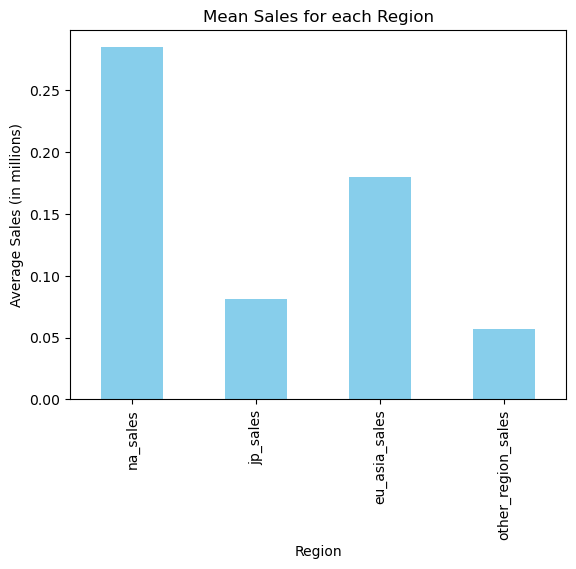

In [40]:
# plotting mean sales per region
avg_sales_per_region = video_game_sales_no_outlier[['na_sales', 'jp_sales', 'eu_asia_sales', 'other_region_sales']].mean()

# Using plt from matplotlib for platting the bar plot between average sales and all the regions in the dataset
avg_sales_per_region.plot(kind='bar', color='skyblue')
plt.title('Mean Sales for each Region')
plt.xlabel('Region')
plt.ylabel('Average Sales (in millions)')
plt.show()


## From the above plotted bar plot we can see the na_sales influence the global sales the most  followed by eu_asia

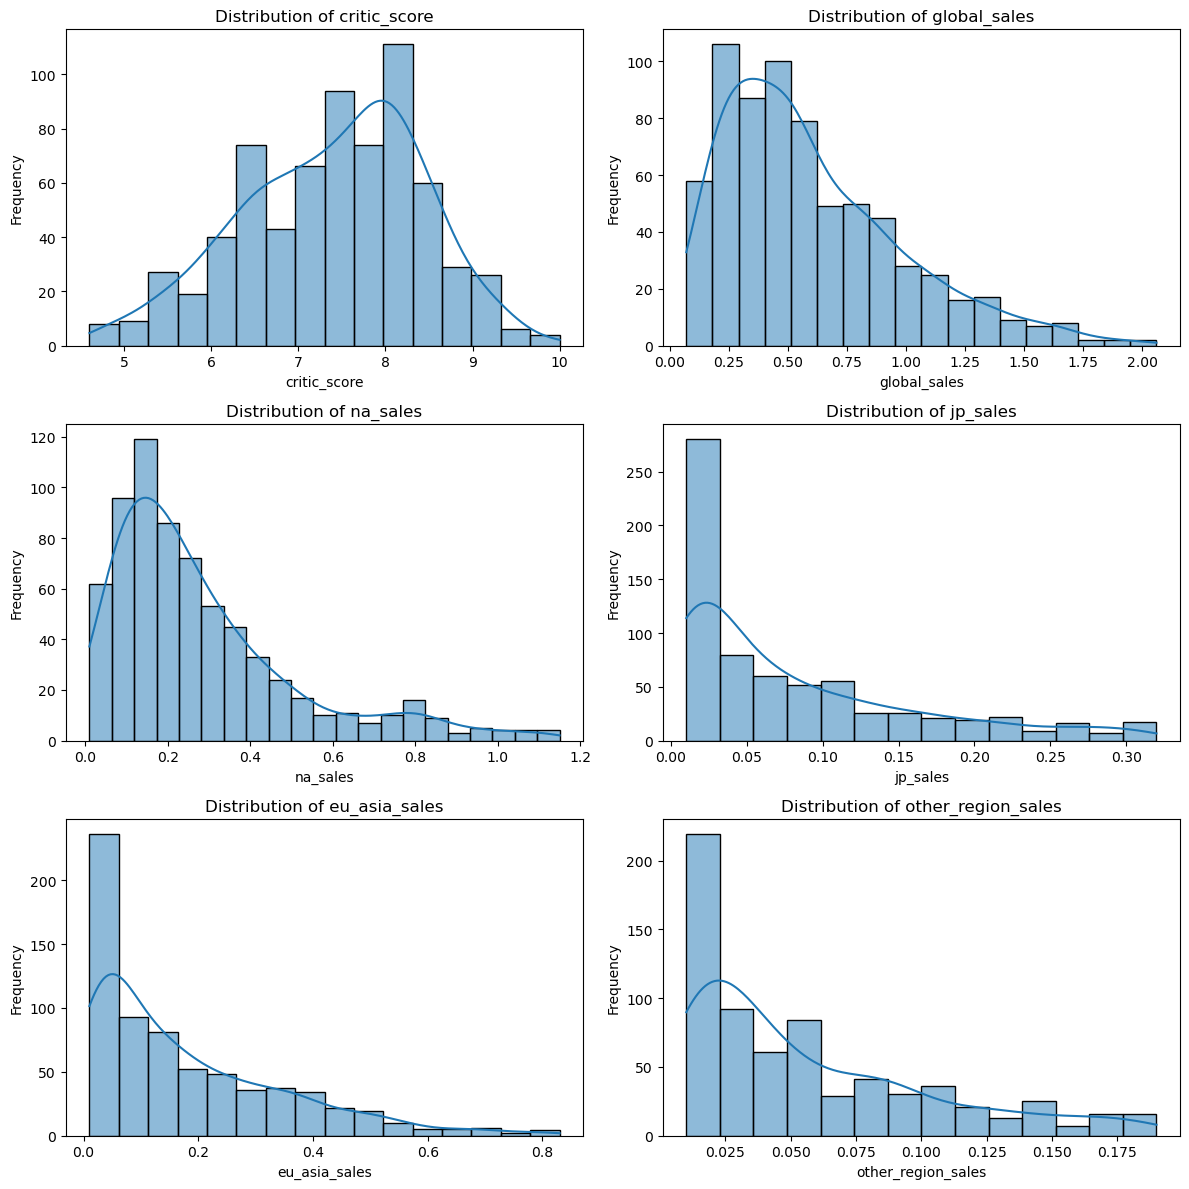

In [42]:
## In this cell we will create subplots plotting histplots for all the number columns we have in the data to see the distribution

# Selecting only numeric columns
# numeric_cols = video_game_sales_no_outlier.select_dtypes(include='number').columns

# Define the number of subplots depending on the number of numeric columns
num_plots = len(number_cols)
num_rows = (num_plots + 1) // 2  # 2 plots per row

# Creating subplots by setting figure size and number of rows columns
fig, ax = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))  # Adjusting figure size for clarity

## .flatten() makes working with multiple plots by turning a grid of plots into a single list, so you can loop through them easily.
ax = ax.flatten()

# Looping through number columns and creating a histogram for each by using seaborn
for i, col in enumerate(number_cols):
    sns.histplot(video_game_sales_no_outlier[col], kde=True, ax=ax[i])
    ##title function is used to set the title of the graph
    ax[i].set_title(f'Distribution of {col}')
    ##xlabel function is used to add the labeling of the x axis
    ax[i].set_xlabel(col)
    ##ylabel function is used to add the labeling of the y axis
    ax[i].set_ylabel('Frequency')

# cheking that If there are fewer columns than subplot spaces then hide extra axes
for j in range(i+1, len(ax)):
    ax[j].axis('off')

## function of matplotlib which is used to automatically adjust the layout of the plots in the figure
plt.tight_layout()
## function of the matplotlib to show the plots
plt.show()

### Distribution of Critic Score: The critic scores follow a roughly normal distribution, with most games scoring around 7-8.  We can see there are fewer games  in the extremes with low or high scores.

### Distribution of Global Sales: This is right-skewed, indicating most games have low global sales, with a few high-selling outliers.

### Distribution of NA Sales: Similar to global sales, the NA sales are right-skewed, with the majority of games having low sales in North America.

### Distribution of JP Sales: The distribution shows that most games have very low sales in Japan, with very few games reaching higher sales figures(This can be found out by one of the answers to out objective).

### Distribution of EU/Asia Sales: Like other regions, EU/Asia sales are right-skewed, with most games having minimal sales and only a few achieving significant numbers.

### Distribution of Other Region Sales: This follows a similar pattern, with most games having negligible sales in other regions and a few exceptions selling more.

### These distributions suggest that video game sales are concentrated at the lower end in most regions, with a few best-sellers significantly outperforming the majority.

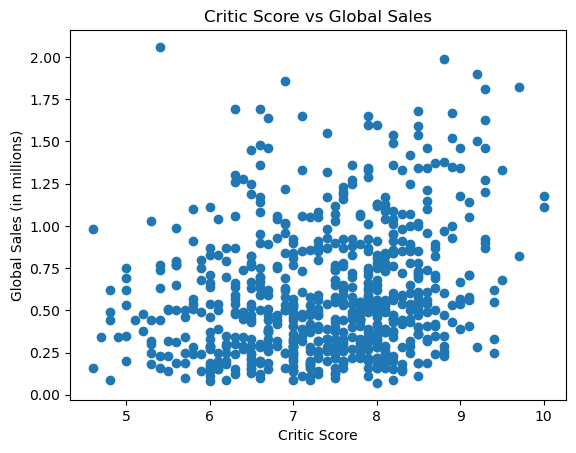

In [44]:
##scatter function from matplotlib is used to plot scatter plot
plt.scatter(video_game_sales_no_outlier['critic_score'], video_game_sales_no_outlier['global_sales'])

##title function from matplotlib is used to set the title of the graph
plt.title('Critic Score vs Global Sales')

##xlabel function from matplotlib is used to add the labeling of the x axis
plt.xlabel('Critic Score')

##ylabel function from matplotlib is used to add the labeling of the y axis
plt.ylabel('Global Sales (in millions)')

## function of the matplotlib to show the plots
plt.show()

### Critic Score vs. Global Sales: This above scatter plot shows a positive relationship between critic scores and global sales column, we can see high rated games tend to sell more but the relationship is not very strong as there are many games with both low and high sales at various critic scores, especially between scores of 6.5 to 8.5.

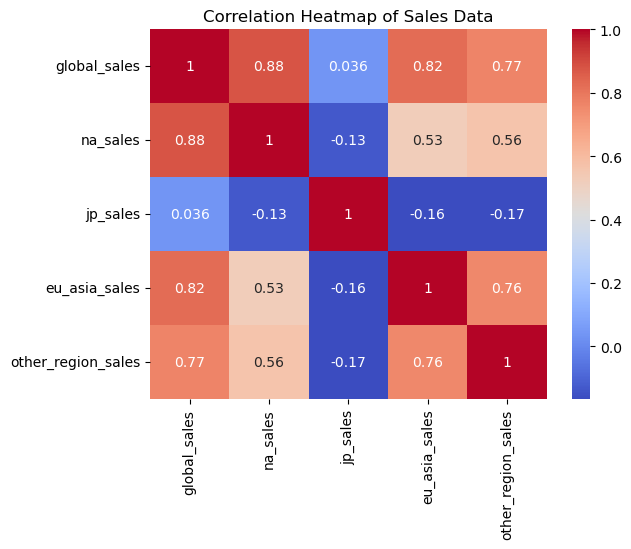

In [46]:
## taking only the sales column to check the correlation
sales_columns = ['global_sales', 'na_sales', 'jp_sales', 'eu_asia_sales', 'other_region_sales']

## .corr() will calculate the correlation between column using a number that we will see in the heatmap
cor_matrix = video_game_sales_no_outlier[sales_columns].corr()

##heatmap function from matplotlib is used for visualising the correlation between the columns passed though the heatmap intensity graph
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

##title function from matplotlib is used to set the title of the graph
plt.title('Correlation Heatmap of Sales Data')
plt.show()


### The above plotted Heatmap of Sales value visualizes the correlation between sales across different regions. Global sales have strong positive correlations with sales in all other regions, particularly North America (0.88), EU/Asia (0.82), and other regions (0.77). On the other hand, Japan sales show very low or even negative correlations with other regions, indicating that the Japanese market behaves differently compared to others(We can check this later in the EDA section by answering one on the questions).

## 3. EDA


In [49]:
# perform your EDA

# Question1: Which platform has historically generated the highest global sales?

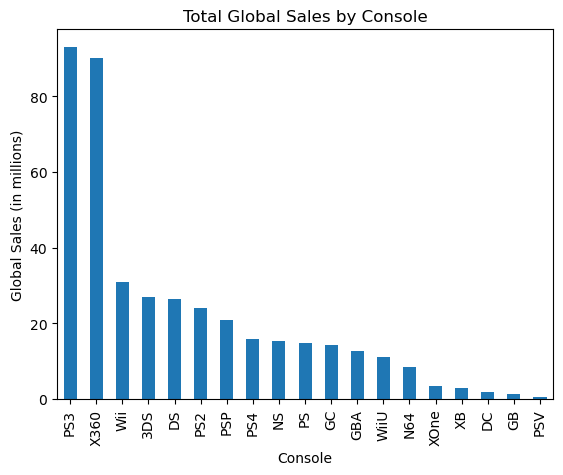

In [51]:
## to answer out first question we can directly do the group by console and take the total sales worldwide and plot a bar plot
platform_sales = video_game_sales_no_outlier.groupby('console')['global_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar')

##title function from matplotlib is used to set the title of the graph
plt.title('Total Global Sales by Console')

##xlabel function from matplotlib is used to add the labeling of the x axis
plt.xlabel('Console')

##ylabel function from matplotlib is used to add the labeling of the y axis
plt.ylabel('Global Sales (in millions)')
plt.show()

## The above plot signifies clearly that PS3 and X360 Console leads the sales percentage significantly compare to other consoles

# Question2: What are the most popular video game genres in terms of sales?

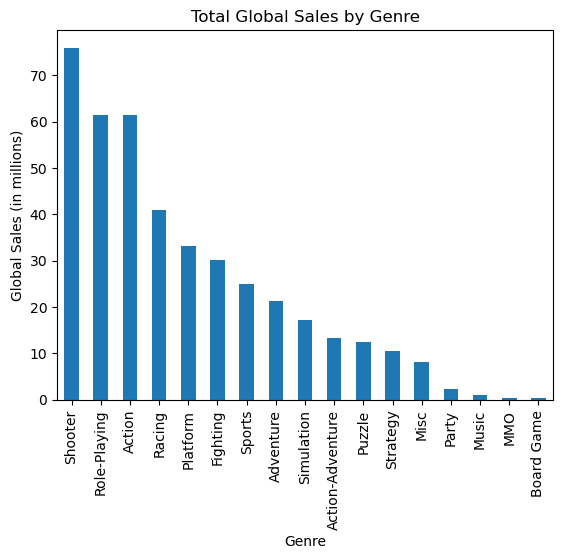

In [54]:

## to answer out second question we can do the similar operation as before, group by genre and take the total sales worldwide and plot a bar plot
genre_sales = video_game_sales_no_outlier.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar')

##title function from matplotlib is used to set the title of the graph
plt.title('Total Global Sales by Genre')

##xlabel function from matplotlib is used to add the labeling of the x axis
plt.xlabel('Genre')

##ylabel function from matplotlib is used to add the labeling of the y axis
plt.ylabel('Global Sales (in millions)')
plt.show()

## The above plot shows the genre of the game shooter is the most bought game in the world

#  Question3: Do people buy particular console to play specific type of game or not?

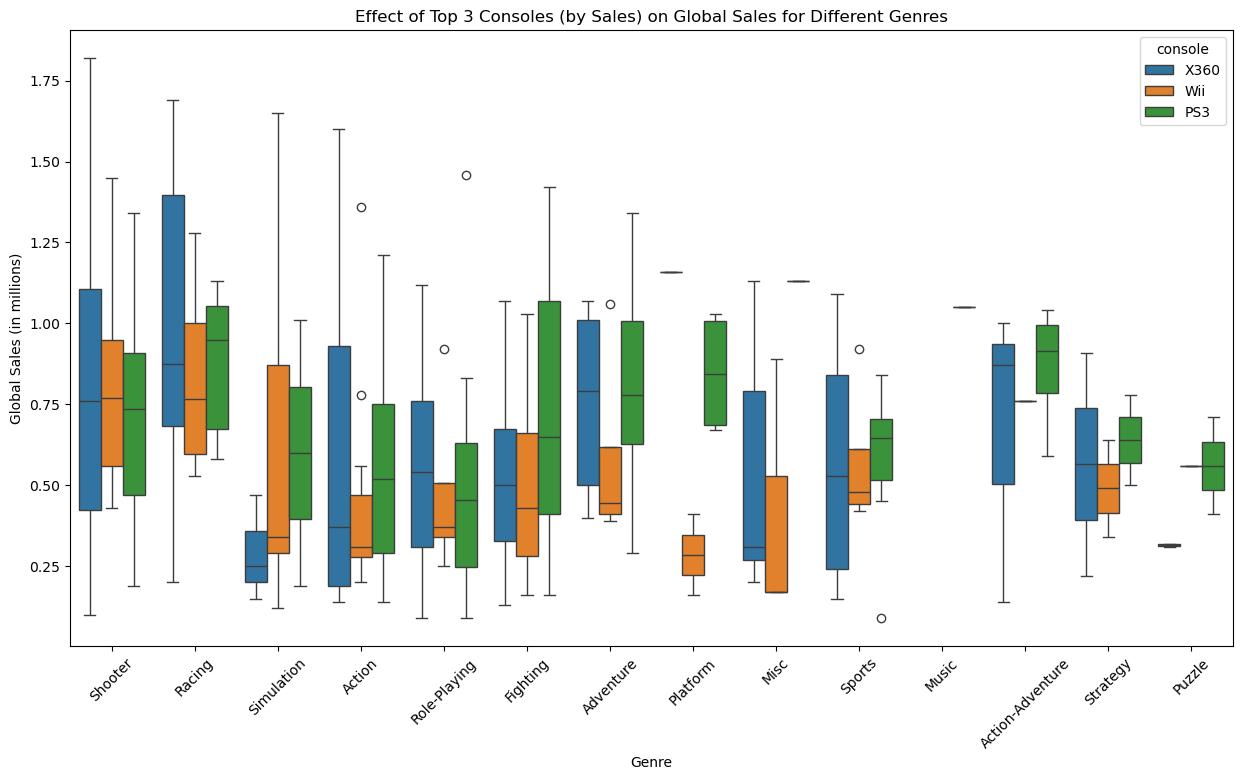

In [57]:
# performing grouping by console and adding the global sales to get the top 3 consoles by sales
top_3 = video_game_sales_no_outlier.groupby('console')['global_sales'].sum().nlargest(3).index

# filtering the dataframe for only the top 3 consoles by sales 
top_3_sales = video_game_sales_no_outlier[video_game_sales_no_outlier['console'].isin(top_3)]

# Seting the big figure size for better readability
plt.figure(figsize=(15, 8))

# creating a box plot to compare sales and genre for the top 3 consoles using seaborn library .boxplot()
sns.boxplot(x='genre', y='global_sales', hue='console', data=top_3_sales)

# title function from matplotlib is used to set the title of the graph
plt.title('Effect of Top 3 Consoles (by Sales) on Global Sales for Different Genres')

## the xticks function simply means to tilt the labels on the bottom of the graph by a certain degrees so they are easier to read.
plt.xticks(rotation=45)
##ylabel function from matplotlib is used to add the labeling of the y axis
plt.ylabel('Global Sales (in millions)')

##xlabel function from matplotlib is used to add the labeling of the x axis
plt.xlabel('Genre')

# Display the plot
plt.show()


## This above plot shows the effect of the top three consoles (Xbox 360, PS3, Wii) on global sales across multiple genres. The Xbox 360 generally outperforms the PS3 and Wii in racing and shooter genres which shows a preference for these types of games among Xbox users. The PS3 shows competitive sales in action, adventure and role-playing genres, while the Wii has a notable presence in simulation games.

# Question4: Which Genre Has the Best Sales Performance in Different Regions?

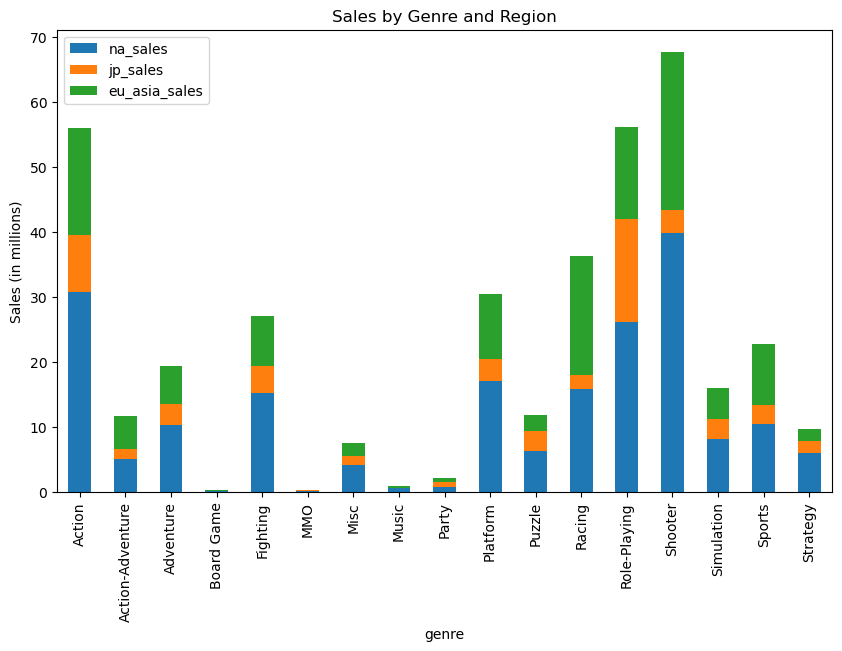

In [60]:
## performing grouping by withngenre and taking region wise total sales to answer our fourth quesiton
sales_by_genre_region = video_game_sales_no_outlier.groupby('genre')[['na_sales', 'jp_sales', 'eu_asia_sales']].sum()
sales_by_genre_region.plot(kind='bar', stacked=True, figsize=(10, 6), title='Sales by Genre and Region')

##ylabel function from matplotlib is used to add the labeling of the y axis
plt.ylabel('Sales (in millions)')
plt.show()

## The above plot displays sales by genre and region, showing North America's dominance in most genres, particularly action and shooter. Europe Asia contribute more to role-playing and competitive in racing genres with NA. Japan region have a stronger market specifically for role-playing games.

# Question5: Does a developer company developed genre type affect the total sales?

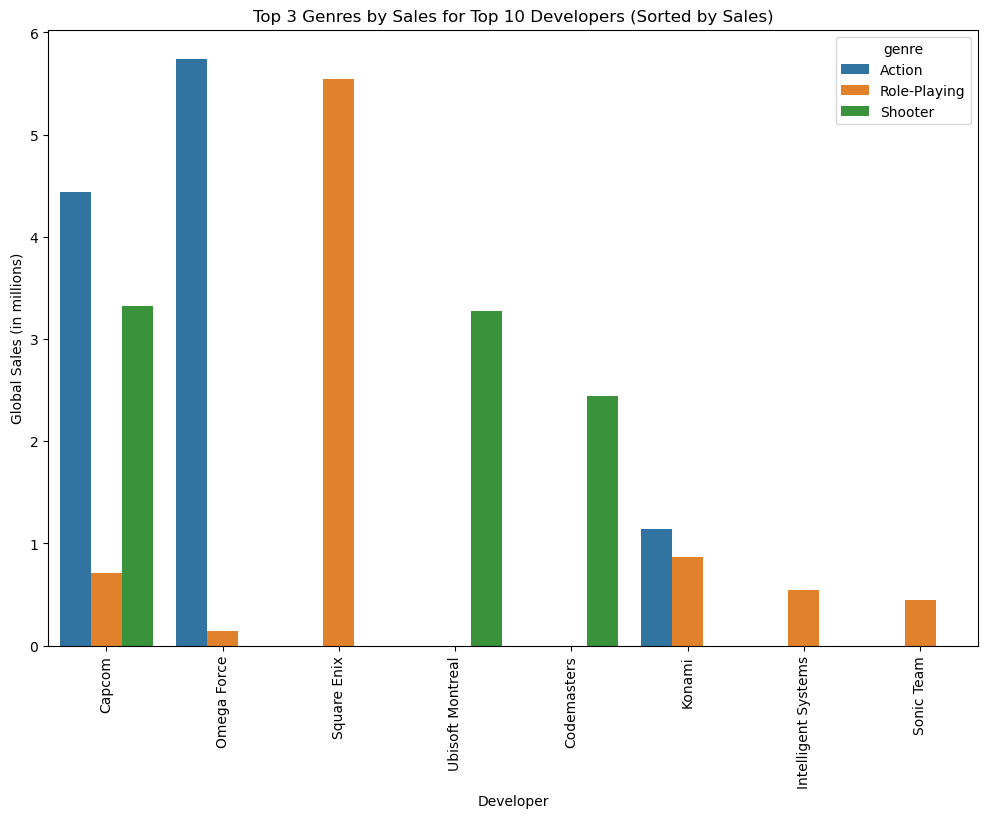

In [63]:
# getting the top 3 genres by total sales worldwide by using nlargest which will return top 3 by sum and taking the index number by .index
top_3_genres = video_game_sales_no_outlier.groupby('genre')['global_sales'].sum().nlargest(3).index

# geting the top 10 developers by total sales worldwide using the same nlargest and getting the indexes
top_10_developers = video_game_sales_no_outlier.groupby('developer')['global_sales'].sum().nlargest(10).index

# filtering the main dataframe to include only the top 3 genres and top 10 developers by sales
filtered_data = video_game_sales_no_outlier[
    (video_game_sales_no_outlier['genre'].isin(top_3_genres)) &
    (video_game_sales_no_outlier['developer'].isin(top_10_developers))
]

# now on the filtered data executing grouping by developer and genre to get the total global sales
dev_genre_sales = filtered_data.groupby(['developer', 'genre'])['global_sales'].sum().reset_index()

# calculating the total sales for each developer and sort by total sales globally
dev_total_sales = dev_genre_sales.groupby('developer')['global_sales'].sum().sort_values(ascending=False).index

# plotting a bar plot with order of developers in the plot based on total sales
plt.figure(figsize=(12, 8))
sns.barplot(x='developer', y='global_sales', hue='genre', data=dev_genre_sales, 
            order=dev_total_sales)

#title function from matplotlib is used to set the title of the graph
plt.title('Top 3 Genres by Sales for Top 10 Developers (Sorted by Sales)')

## the xticks function simply means to tilt the labels on the bottom of the graph by a certain degrees so they are easier to read.
plt.xticks(rotation=90)

##ylabel function from matplotlib is used to add the labeling of the y axis
plt.ylabel('Global Sales (in millions)')

##xlabel function from matplotlib is used to add the labeling of the x axis
plt.xlabel('Developer')

# Display the plot
plt.show()


## The above plot highlights the top 10 developers by global sales across top three genres by sales: action, role-playing, and shooter(We also got this from the first EDA hypothesis answer). Ubisoft Montreal focused only on shooter genre and Square Enix excels in role-playing games. Capcom maintained balanced in performance in both action and shooter genres.

## 4. Conclusion 

## The exploratory data analysis (EDA) of the video game sales dataset has revealed several significant insights regarding sales performance across different consoles, genres, regions, and developers.

## Key Insights

### Console Performance: The analysis revealed that the PS3 and Xbox 360 has generated the highest global sales among all consoles present in the data and the insight underscores the competitive landscape of gaming platforms and popularity comparisions among consumers we got some idea that which console people love playing games with.

### Genre Popularity: The EDA highlighted that the shooter genre is the most purchased genre globally and indicates a strong consumer preference for action packed and competitive gameplay experiences. This will help the game developers to focus on which genre of games.

### Console and Genre Relationship: Our exploration of sales data shows that specific consoles sometimes sticks to particular genres. The Xbox 360 outperforms both the PS3 and Wii in racing and shooter genres which suggests a targeted audience for these types of games. additionally, the PS3 excels in action, adventure and role-playing genres. the Wii console has particularly high sales in simulation games which means they are more of a family oriented branding.

### Regional Sales Trends: The analysis of sales by genre and region interprets NA's dominance in action and shooter genres. In contrast, Europe Asia show a stronger preference for role-playing and racing games, with Japan having a particularly robust market for role-playing titles. This regional differences implies the need for region wise strategies to create the diverse gaming preferences.

### Developer Influence: The EDA of top developers by global sales across key genres revealed that Ubisoft Montreal specializes in shooters, while Square Enix specializes in role-playing games and Capcom demonstrates balanced performance in both action and shooter genres which indicates that developers often have specific strengths in particular game categories. This insight can guide future collaborations and investment decisions within the industry.

## 5. Summary

### The findings from this EDA suggest that the video game market is complex and influenced by various factors, including platform popularity, genre preferences, regional tastes, and developer strengths. Developers can use these EDA results to discuss with their product  and marketing team regarding strategies which will ensure that they serve to the most profitable part of the gaming market. By focusing on the leading consoles, understanding genre and regional trends, and recognizing the strengths of different developers, gaming companies can optimize their planning to maximize sales and understand what most of the videos gamers want.

## Future Work
### For future research there kind of data can be used for further research:

### Consumer Demographics: including demographic data (such as age, gender, and location) could provide deeper insights into gaming preferences and purchasing behavior of different age groups.

### Impact of Game Updates: We can know how post-launch updates and community feedback influence long-term sales trends could help developers understand the lifecycle of their video games.

### Comparative Analysis: Analyzing sales trends over time for different platforms could reveal shifts in consumer preferences and the factors driving these changes.

### Influence of Marketing: Examining the correlation between marketing strategies and sales performance could offer insights into effective promotional tactics within the gaming industry.

## References

- Matplotlib Documentation - For understanding plotting techniques used in the analysis.
- Pandas Documentation - Helpful for data manipulation and cleaning techniques.
- Seaborn Documentation - Useful for advanced visualization techniques.
- Exploratory Data Analysis Resources - A guide to conducting EDA in Python.
- ChatGPT - Code Error Debugging